In [144]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("IRIS.csv")

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data.shape

(150, 5)

In [20]:
data.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [24]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [106]:
x = data.drop("species", axis = 1)
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [32]:
y = data["species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [198]:
scaler = StandardScaler()
xs = scaler.fit_transform(x)

In [162]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
k_label = kmeans.fit_predict(xs)

ari_km = adjusted_rand_score(y, k_label)
nmi_km = normalized_mutual_info_score(y, k_label)

print("KMeans")
print(ari_km)
print(nmi_km)

KMeans
0.4289511167236898
0.5873776041729258


C:\Users\gopik\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [104]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_label = agglo.fit_predict(xs)

ari_agglo = adjusted_rand_score(y, agglo_label)
nmi_agglo = normalized_mutual_info_score(y, agglo_label)

print("Heirarchial")
print(ari_agglo)
print(nmi_agglo)

Heirarchial
0.6153229932145449
0.6754701853436886


In [170]:
dbscan = DBSCAN(eps=0.6, min_samples=3)
dbscan_label = dbscan.fit_predict(xs)

ari_dbscan = adjusted_rand_score(y, dbscan_label)
nmi_dbscan = normalized_mutual_info_score(y, dbscan_label)

print("DBSCAN")
print(ari_dbscan)
print(nmi_dbscan)

DBSCAN
0.5238576155196973
0.6048016785230341


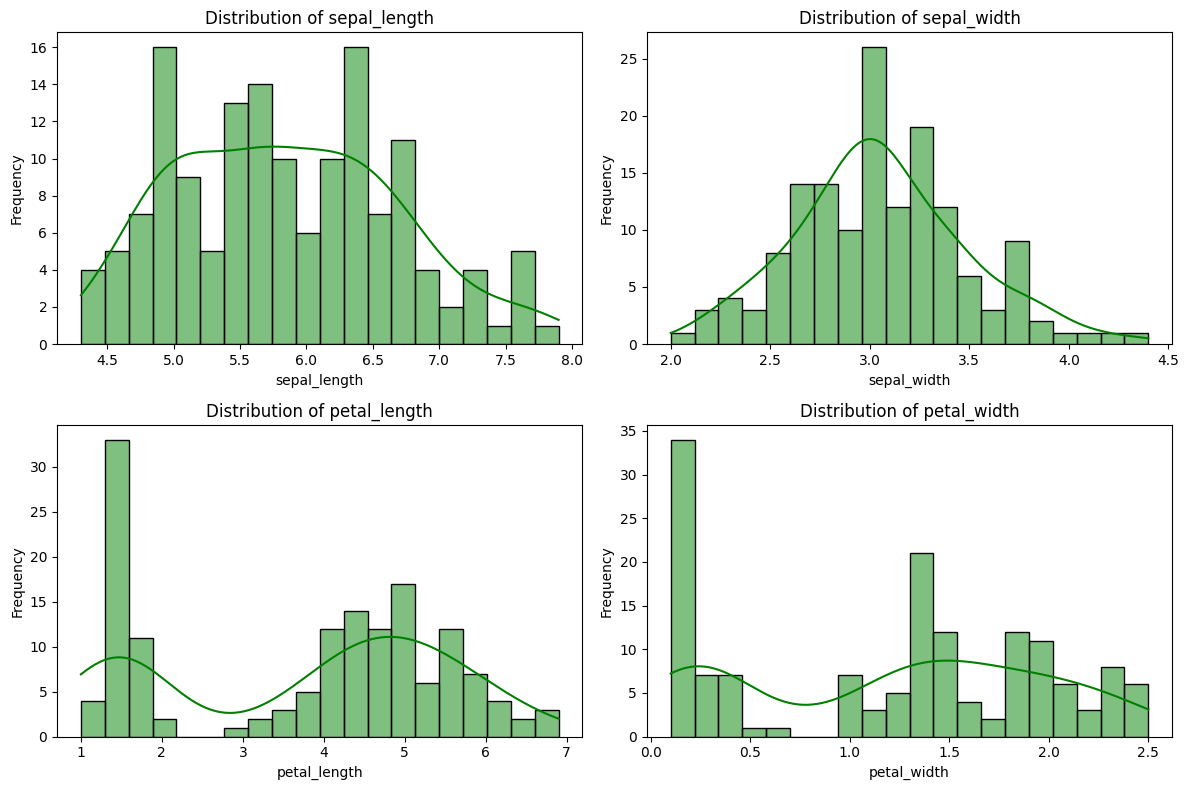

In [132]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(12, 8))
for idx, coln in enumerate(col):
    plt.subplot(2, 2, idx + 1)
    sns.histplot(data[coln], kde=True, color='green', bins=20)
    plt.title(f'Distribution of {coln}')
    plt.xlabel(coln)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

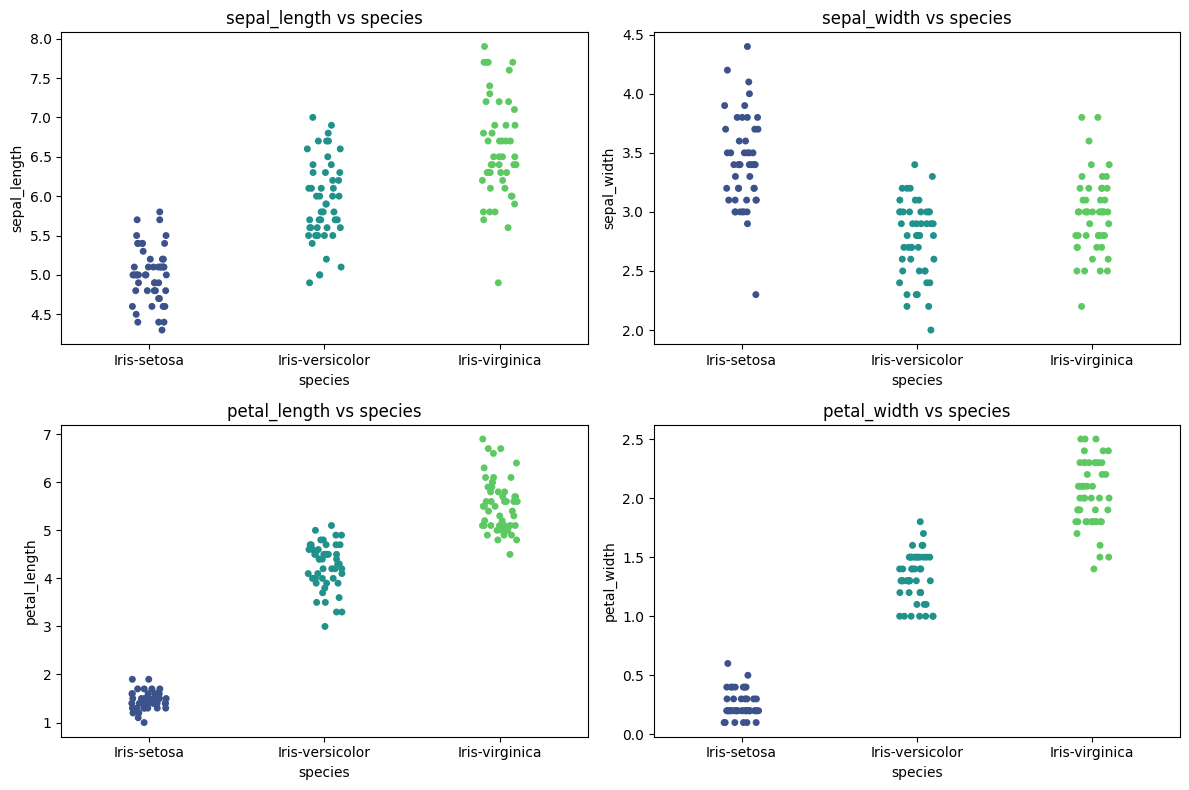

In [142]:
target = 'species'  

plt.figure(figsize=(12, 8))

for idx, feature in enumerate(col):
    plt.subplot(2, 2, idx + 1)
    sns.stripplot(data=data, x=target, y=feature, jitter=True,hue = target, palette="viridis")
    plt.title(f'{feature} vs {target}')
    plt.xlabel(target)
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

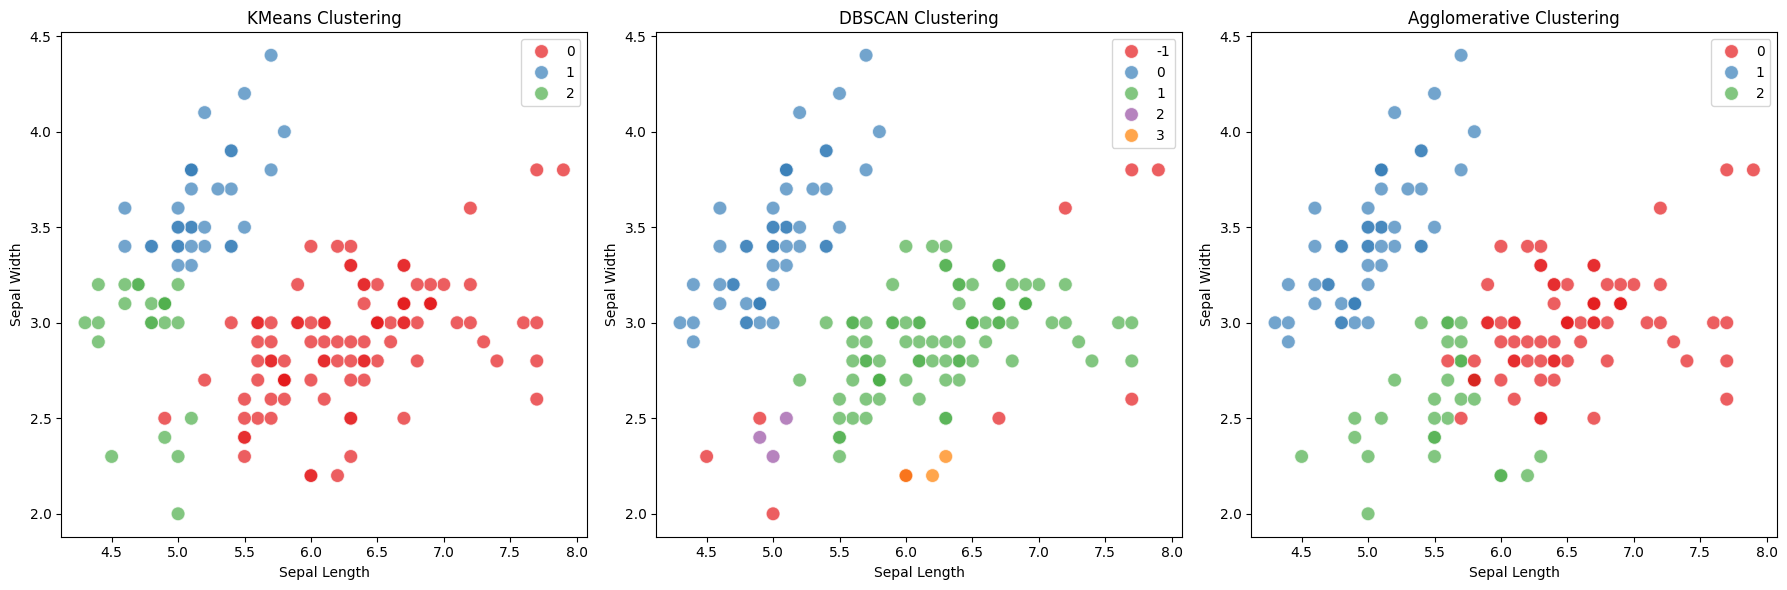

In [172]:
models = {
    "KMeans": k_label,
    "DBSCAN": dbscan_label,
    "Agglomerative": agglo_label
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_name, labels) in enumerate(models.items()):
    ax = axes[idx]

    sns.scatterplot(x=x['sepal_length'], y=x['sepal_width'], hue=labels, palette="Set1", s=100, alpha=0.7, ax=ax)
    
    ax.set_title(f'{model_name} Clustering')
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')

plt.tight_layout()
plt.show()

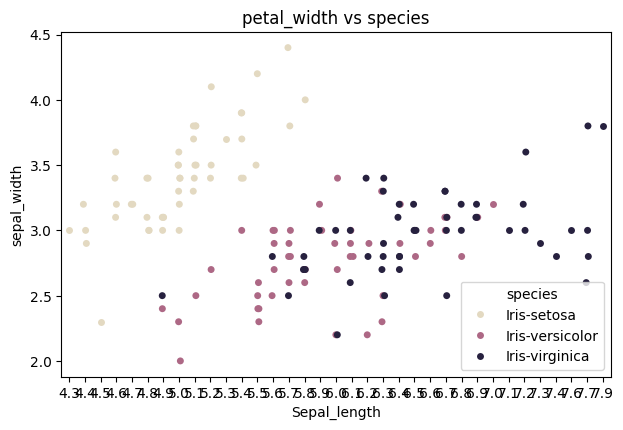

In [192]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.stripplot(data=data, x=x['sepal_length'], y=x['sepal_width'], jitter=True,hue = target, palette="ch:s=-.2,r=.6")
plt.title(f'{feature} vs {target}')
plt.xlabel("Sepal_length")
plt.ylabel('sepal_width')

plt.tight_layout()
plt.show()

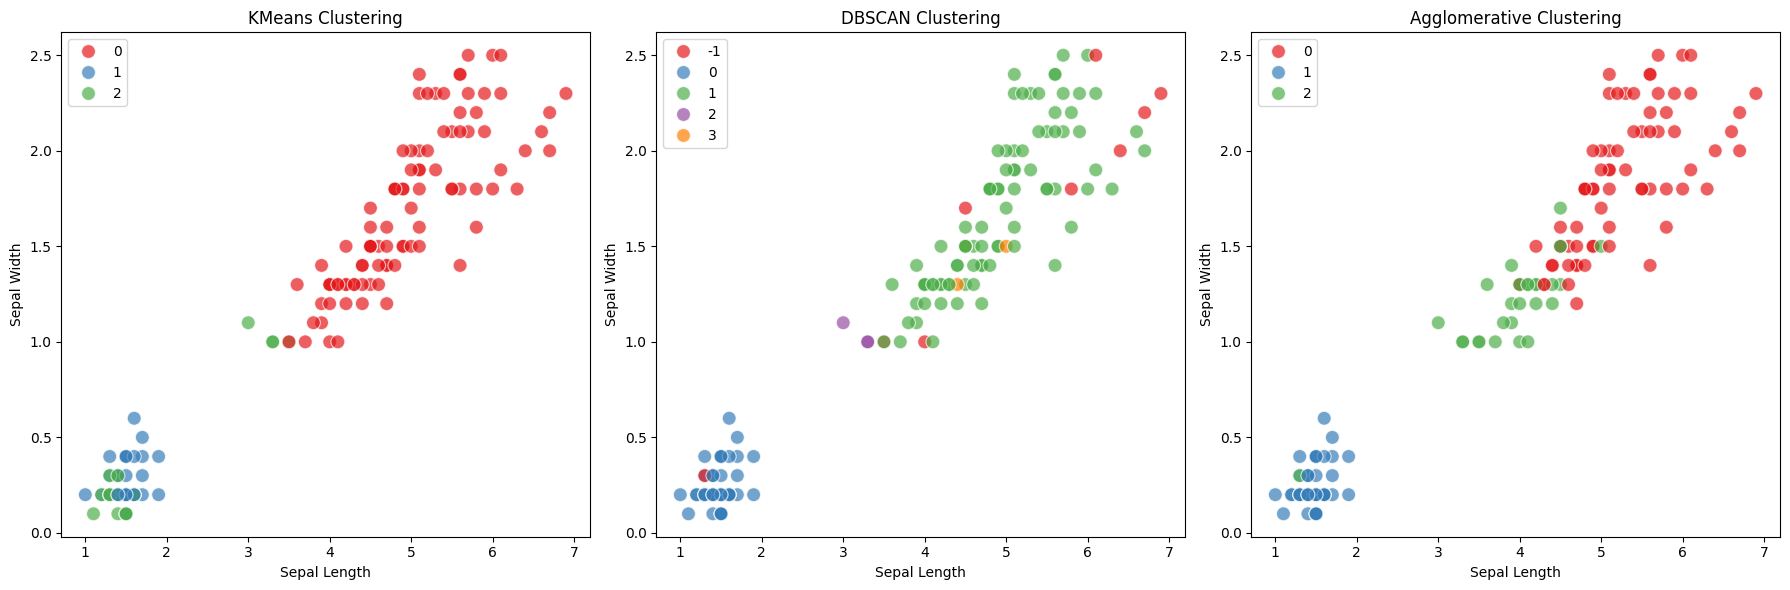

In [196]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_name, labels) in enumerate(models.items()):
    ax = axes[idx]

    sns.scatterplot(x=x['petal_length'], y=x['petal_width'], hue=labels, palette="Set1", s=100, alpha=0.7, ax=ax)
    
    ax.set_title(f'{model_name} Clustering')
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')

plt.tight_layout()
plt.show()

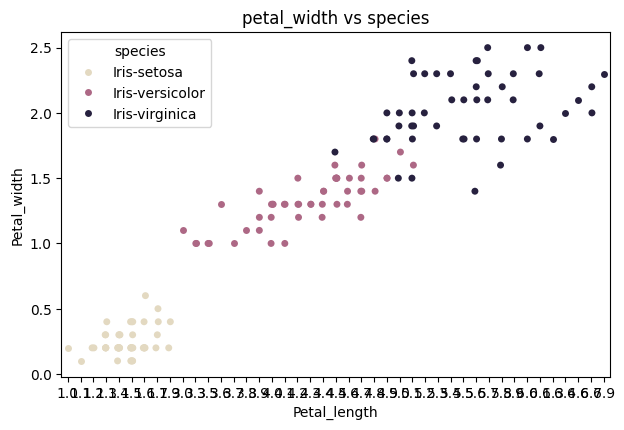

In [204]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.stripplot(data=data, x=x['petal_length'], y=x['petal_width'], jitter=True,hue = target, palette="ch:s=-.2,r=.6")
plt.title(f'{feature} vs {target}')
plt.xlabel("Petal_length")
plt.ylabel('Petal_width')

plt.tight_layout()
plt.show()

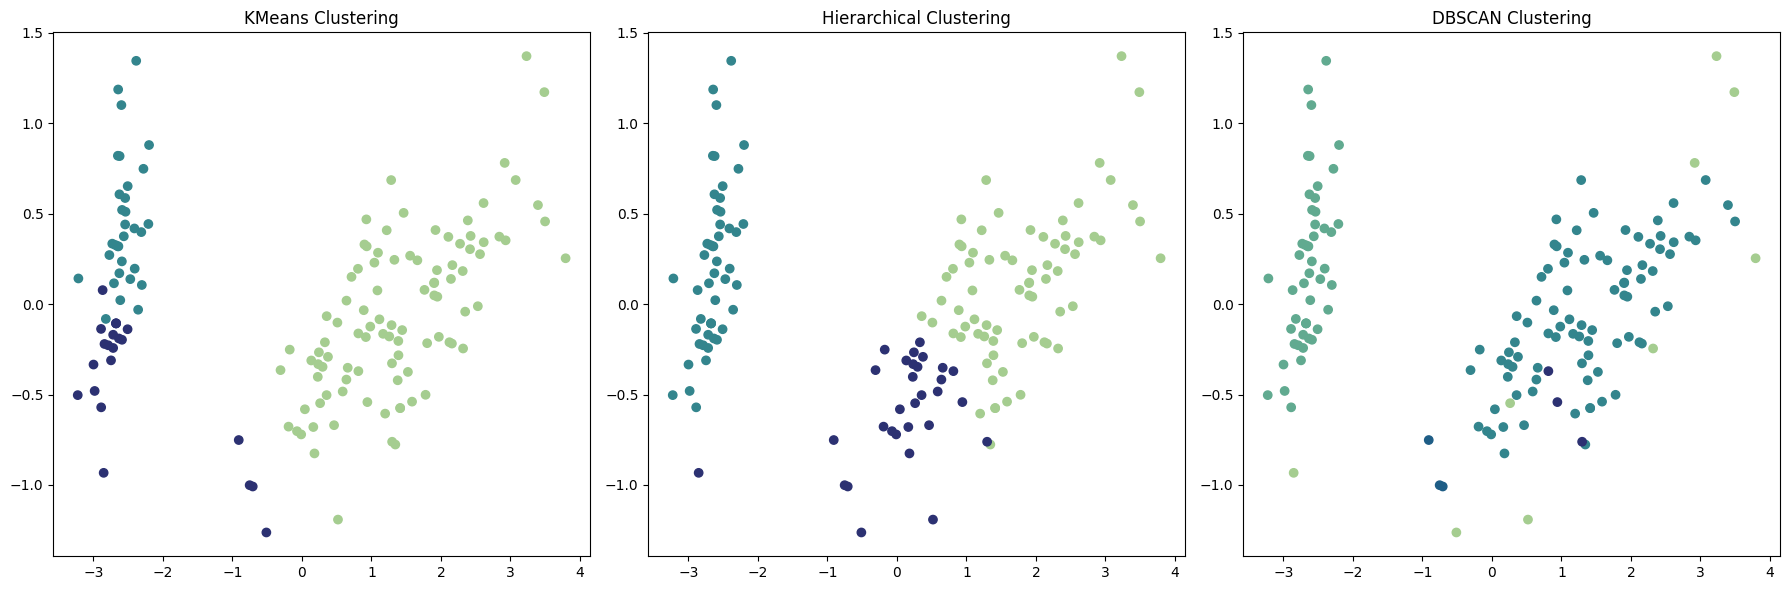

In [226]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='crest')
axes[0].set_title("KMeans Clustering")

axes[1].scatter(x_pca[:, 0], x_pca[:, 1], c=agglo.labels_, cmap='crest')
axes[1].set_title("Hierarchical Clustering")

axes[2].scatter(x_pca[:, 0], x_pca[:, 1], c=dbscan.labels_, cmap='crest')
axes[2].set_title("DBSCAN Clustering")

plt.tight_layout()
plt.show()
